For this notebook you will need

+ numpy
+ matplotlib
+ scipy
+ scikit-learn

$$
% \let\vaccent=\v % rename builtin command \mathbf{} to \vaccent{}
% \renewcommand{\v}[1]{{\mathbf{#1}}} % for vectors
% \renewcommand{\gv}[1]{{\mbox{\boldmath$ #1 $}}} 
% \renewcommand{\uv}[1]{{\mathbf{\hat{#1}}}} % for unit vector
% \renewcommand{\abs}[1]{\left| #1 \right|} % for absolute value
% \renewcommand{\avg}[1]{\left< #1 \right>} % for average
% % \let\underdot=\d % rename builtin command \d{} to \underdot{}
% \newcommand{\d}[2]{\frac{d #1}{d #2}} % for derivatives
% \newcommand{\dd}[2]{\frac{d^2 #1}{d #2^2}} % for double derivatives
% \newcommand{\pd}[2]{\frac{\partial #1}{\partial #2}} 
% \renewcommand\eqref[1]{Eq.\;\ref{#1}} % new version of eqref
$$

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Eigensystem calculations, optimization, and linear dynamical systems

### Finding eigenspectra is difficult for large matrices

Suppose we are given a square matrix $A \in \mathbb{R}^{N \times N}$. How can we find the eigenvalues and eigenvectors of this matrix numerically? The schoolyard method for performing this calculation consists of first solving the characteristic equation for the eigenvalues $\lambda$ such that
$$
\det(A - \lambda \mathbb I) = 0.
$$
In principle, this equation always factors into a polynomial with solutions corresponding to the eigenvalues $(\lambda - \lambda_1)(\lambda - \lambda_2)...(\lambda - \lambda_N) = 0$. However, as $N$ grows larger, it becomes progressively more difficult to factor the equation and find the roots $\lambda_i$, since the polynomial has order $\mathcal{O}(\lambda^N)$. At large $N$, it often becomes impractical to use numerical root-finding to solve the eigenvalue problem using schoolyard methods.

### The power method

The [power method](https://www.cs.huji.ac.il/w~csip/tirgul2.pdf) is a purely iterative method for finding the leading eigenvector of large matrices. The basic algorithm is as follows:

0. We start with a matrix $A \in \mathbb{R}^{N \times N}$.
1. Pick a random vector $\mathbf{v} \in \mathbb{R}^{N}$, and convert it to a unit vector by scaling it with its own norm $\mathbf{v} \leftarrow \mathbf{v}/{||\mathbf{v}||}$.
2. Compute the matrix product of our matrix $A$ with the random unit vector, and then update the vector $\mathbf{v} \leftarrow A \mathbf{v}$.
3. Re-normalize the resulting vector, producing a new unit vector, $\mathbf{v} \leftarrow \mathbf{v}/{||\mathbf{v}||}$
4. Repeat steps 2 and 3 until the elements of the output unit vector fluctuate less than a pre-specified tolerance
5. Multiply the resulting vector by the original matrix $A$. The length of the resulting vector gives the magnitude of the leading eigenvalue

### The power method derivation

Suppose we seek to find the leading eigenvector of a matrix $A$. If the matrix $A$ is non-singular, then it has a full-rank eigenbasis $V \in \mathbb{R}^{n \times n}$, spanned by the $N$ independent, orthonormal eigenvectors $\mathbf{\hat{v}}_i$ such that $\mathbf{\hat{v}}_i \cdot \mathbf{\hat{v}}_j = \delta_{ij}$. We start with a our random vector $\mathbf{w}$, and write it in terms of the basis $V$,
$$
\mathbf{w} = w_1 \mathbf{\hat{v}}_1 + w_2 \mathbf{\hat{v}}_2 + ... + w_N \mathbf{\hat{v}}_N
$$
$$
A \mathbf{w} = \lambda_1 w_1 \mathbf{\hat{v}}_i + \lambda_2 w_2 \mathbf{\hat{v}}_2 + ... + \lambda_N w_N \mathbf{\hat{v}}_N
$$

We next compute the norm of the output vector

$$
A \mathbf{w} \cdot  A \mathbf{w} = \lambda_1^2 w_1^2 + \lambda_1^2 w_1^2 + ... + \lambda_1^N w_1^N
$$
for simplicity, we define $C \equiv \sqrt{\lambda_1^2 w_1^2 + \lambda_1^2 w_1^2 + ... + \lambda_1^N w_1^N}$. Rescaling our transformed vector by the norm, we apply the matrix $A$ again,
$$
A \cdot (A \cdot \mathbf{w})/C = (1/C) (\lambda_1^2 w_1 \mathbf{\hat{v}}_i + \lambda_2^2 w_2 \mathbf{\hat{v}}_2 + ... + \lambda_N^2 w_N \mathbf{\hat{v}}_N)
$$

This quantity has the norm,
$$
||A \cdot (A \cdot \mathbf{w})/C||^2 = (1/C^2) (\lambda_1^4 w_1^2 \mathbf{\hat{v}}_i + \lambda_2^4 w_2 \mathbf{\hat{v}}_2 + ... + \lambda_N^4 w_N \mathbf{\hat{v}}_N)
$$

Now we consider the limit as as $M \rightarrow \infty$. Without loss of generality, we assume that the $N$ eigenvalues of $A$ are ordered by their magnitude, $|\lambda_1| > |\lambda_2| > ... > |\lambda_N|$. The series above diverges geometrically as we iterate repeatedly, such that

$$
A^M \mathbf{w} \approx \dfrac{\lambda_1^M w_1 + ...}{\sqrt{\lambda_1^{2M} w_1^2 + ...}} \mathbf{\hat{v}}_1 = \mathbf{\hat{v}}_1
$$





## To Do

1. Implement the power method in Python. I've included my starter code below.
2. Sometimes you'll notice that the power method fails to converge to the correct solution. What is special about randomly-sampled matrices where this occurs? How does the direction of the starting vector affect the time it takes to reach a solution? 
2. Suppose that we interpret a given linear matrix $X$ as describing a discrete-time linear dynamical system, $\mathbf{y}_{t+1} = X \mathbf{y}_t$. What kind of dynamics does the power method exhibit? What about the pathological cases you discussed in the previous solution?
5. The power method represents a basic optimization problem, where we are searching for a convergent solution. We saw that our method occasionally fails to find the correct solution. One way to improve our optimization would be to add a momentum term of the form $$\mathbf{y}_t \leftarrow \gamma \mathbf{y}_{t - 1} + (1 - \gamma) \dfrac{X \mathbf{y}_{t - 1}} {|X \mathbf{y}_{t - 1}}| $$. Where $\gamma \in (0, 1]$. How would you modify your implementation of the power method, in order to allow momentum? What kinds of pathological dynamics would the momentum term help us avoid?
6. Similar to the momentum term, there is also a way to add additional damping to the update rule. What kinds of dynamics would that help us avoid?
<!-- 7. *Optional:* Perform a computational experiment in which you compare the schoolyard and power method, to see which $N$ they crossover at. -->


In [2]:
import warnings
class SpectralDecompositionPowerMethod:
    """
    Store the output vector in the object attribute self.components_ and the 
    associated eigenvalue in the object attribute self.singular_values_ 
    
    Why this code structure and attribute names? We are using the convention used by 
    the popular scikit-learn machine learning library:
    https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

    Parameters
        max_iter (int): maximum number of iterations to for the calculation
        tolerance (float): fractional change in solution to stop iteration early
        gamma (float): momentum parameter for the power method
        random_state (int): random seed for reproducibility
        store_intermediate_results (bool): whether to store the intermediate results as
            the power method iterates
        stored_eigenvalues (list): If store_intermediate_results is active, a list of 
            eigenvalues at each iteration
        stored_eigenvectors (list): If store_intermediate_results is active, a list of
            eigenvectors at each iteration
    
    """
    def __init__(self, 
        max_iter=1000, 
        tolerance=1e-5, 
        gamma=0.0,
        random_state=None, 
        store_intermediate_results=False
    ):
        ########## YOUR CODE HERE ##########
        #
        # YOUR CODE HERE
        
        # assgining object fields
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.gamma = gamma
        self.random_state = random_state

        # Placeholders for the results of the calculation
        self.singular_values_ = None
        self.components_ = None
        
        self.store_intermediate_results = store_intermediate_results
        # if the intermediate results are present, create new lists
        if self.store_intermediate_results:
            # create new list for eigenvalues
            self.stored_eigenvalues = list()
            # create new list for eigenvectors
            self.stored_eigenvectors = list()
        

        ########## YOUR CODE HERE ##########
        #raise NotImplementedError()
    
    def fit(self, A):
        """
        Perform the power method with random initialization, and optionally store
        intermediate estimates of the eigenvalue and eigenvectors at each iteration.
        You can add an early stopping criterion based on the tolerance parameter.
        """
        ########## YOUR CODE HERE ##########
        #
        # YOUR CODE HERE
        # Hint: keep track of your normalization factors, and watch out for passing
        # arrays by value vs. by reference. This method should return self
        
        # gets number of rows of matrix A
        n = A.shape[0]
        # use the random state to get a specific randomization seed
        np.random.seed(self.random_state)
        # create a vector of random values from  (0.0, 1.0]
        vec = np.random.random(n)
        vec = vec / np.linalg.norm(vec)

        if self.store_intermediate_results:
            self.stored_eigenvalues.append(1)
            self.stored_eigenvectors.append(vec)
        for i in range(self.max_iter):

            prev = np.copy(vec)
            vec = A.dot(vec)
            eig_val = np.linalg.norm(vec) # \sqrt(\sum_i x_i^2)
            vec = vec / eig_val

            ## A heuristic: momentum based on the previous iteration
            vec = self.gamma * prev + (1 - self.gamma) * vec

            ## An even better heuristic: we update gamma based on the error signal
            # vec = (1 - err) * prev + err * vec
            # err = np.sqrt((vec - prev)**2 / prev**2)

            if self.store_intermediate_results:
                self.stored_eigenvalues.append(eig_val)
                self.stored_eigenvectors.append(vec)

            if np.mean(np.sqrt((vec - prev)**2 / prev**2)) < self.tolerance:
                warnings.warn(f"Power method converged before {self.max_iter} iterations")
                break
        
        if self.store_intermediate_results:
            self.stored_eigenvalues = np.array(self.stored_eigenvalues)
            self.stored_eigenvectors = np.array(self.stored_eigenvectors)
        
        self.singular_values_ = eig_val
        self.components_ = vec



        ########## YOUR CODE HERE ##########
        # raise NotImplementedError()


### Test and use your code

+ If you are working from a local fork of the entire course, then you already have access to the solutions. In this case, make sure to `git pull` to make sure that you are up-to-date (save your work first).
+ If you are working from a single downloaded notebook, or are working in Google Colab, then you will need to manually download the solutions file from the course repository. The lines below will do this for you.

In [4]:
import os
import requests
# Check if the "solutions" directory exists. If not, create it and download the solution file
if not os.path.exists('solutions'):
    os.makedirs('solutions')
else:
    print('Directory "solutions" already exists. Skipping creation.')

# Now download the solution file into the directory we just created
url = 'https://raw.githubusercontent.com/williamgilpin/cphy/main/hw/solutions/eigen.py'
response = requests.get(url)
file_path = os.path.join('solutions', 'sandpile.py')
with open(file_path, 'wb') as file:
    file.write(response.content)
print(f'File saved to {file_path}')

Directory "solutions" already exists. Skipping creation.
File saved to solutions/sandpile.py


18.498457835352376
Power method solution: 3.4844957117295046
Numpy solution: -3.186026702152251


Text(0, 0.5, 'Power method eigenvector')

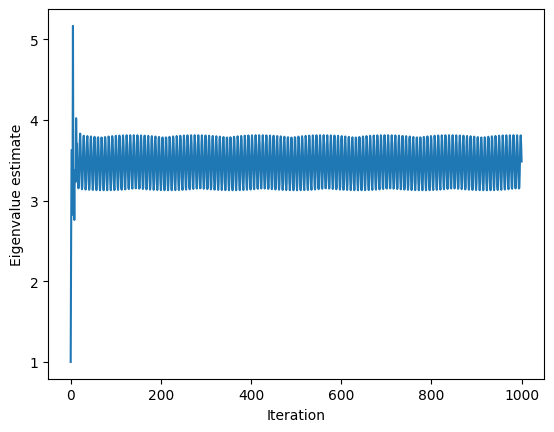

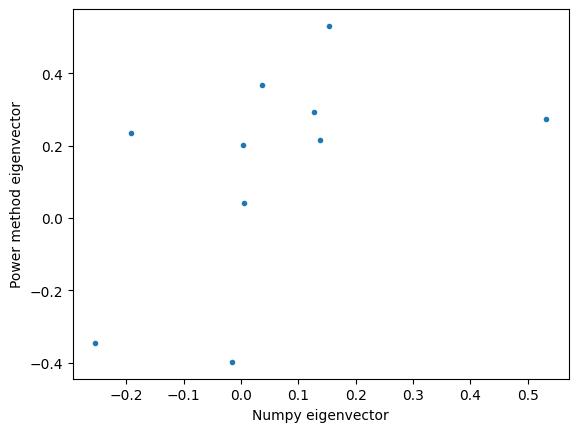

In [6]:
## import William's solutions
# from solutions.eigen import SpectralDecompositionPowerMethod

## Use the default eigensystem calculator in numpy as a point of comparison
def eigmax_numpy(A):
    """
    Compute the maximum eigenvalue and associated eigenvector in a matrix with Numpy.
    """
    eigsys = np.linalg.eig(A)
    ind = np.abs(eigsys[0]).argmax()
    return np.real(eigsys[0][ind]), np.real(eigsys[1][:, ind])


np.random.seed(2) # for reproducibility
mm = np.random.random(size=(10, 10)) / 100
mm = np.random.normal(size=(10, 10))# / 100 # these matrices fail to converge more often

# mm += mm.T # force hermitian

print(np.linalg.cond(mm.T))
model = SpectralDecompositionPowerMethod(store_intermediate_results=True, gamma=0.0)
model.fit(mm);


print(f"Power method solution: {model.singular_values_}")
print(f"Numpy solution: {eigmax_numpy(mm)[0]}")

plt.figure()
plt.plot(model.stored_eigenvalues)
plt.xlabel("Iteration")
plt.ylabel("Eigenvalue estimate")

plt.figure()
plt.plot(eigmax_numpy(mm)[1], model.components_, '.')
plt.xlabel("Numpy eigenvector")
plt.ylabel("Power method eigenvector")


### Follow-up ideas and additional information

+ The runtime complexity of root-finding for a polynomial of the order, $N$ is poorly-defined as a function of $N$, because there are no guaranteed methods for high-order polynomials other than iterative root-finding. A [good guess](https://cs.stackexchange.com/questions/46920/bss-model-computational-complexity-of-finding-the-roots-of-a-polyomial) would be runtime $\mathcal{O}(N)$ with a large prefactor (for each of $N$ roots, perform a line search, discover a solution, and then reduce the polynomial in degree). However, because finding the initial polynomial via taking a determinant has runtime $\mathcal{O}(N^3)$, the overall runtime of this method is still unfavorable compared to iterative methods.

+ The power method gives us the leading eigenvalue and eigenvector of a matrix. What about the full eigenspectrum of the matrix? A more sophisticated version of the power method is the so-called [QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm). Recall how, at each step, we renormalized our eigenvector estimate. If we instead propagate a bundle of random vectors (in order to estimate all of the different eigenvectors), the equivalent of renormalization would be repeated orthonormalization via a mechanism such as Gram-Schmidt. The QR algorithm basically performs this iterative re-orthonormalization very quickly via the QR factorization of the bundle.

+ We just described an iterative algorithm for finding eigenvalues, and we discussed one improvement via the addition of momentum term. It turns out there's lots of other ways to improve our update rule, such as by adjusting the eigenvector estimate at a rate proportional to the previous change (a gradient). Because gradient descent is used to train modern neural networks, there is a lot of research describing the convergence properties of various update rules; [here's a nice list of some common methods](https://ruder.io/optimizing-gradient-descent/index.html). If you want to further improve your power method implementation, try using some of these more modern rules instead.

+ We made an analogy between the iterative power method and the action of a linear dynamical system. For nonlinear dynamical systems, [an algorithm very similar to the power method](https://link.springer.com/article/10.1007/BF02128237) is used to calculate the [Lyapunov exponents](http://www.scholarpedia.org/article/Lyapunov_exponent), which quantify the degree of chaos present in the system. On some level, we can think of nonlinear dynamical systems as linear dynamical systems where the elements of the matrix $A$ change with time and position.

+ Often in scientific computing we encounter highly-rectangular matrices, $A \in \mathbb{R}^{N \times M}$, $M \neq N$. For these systems the eigenvectors are not defined, and the schoolyard polynomial equation for the eigenvalues will be overdetermined ($N > M$) or underdetermined ($N < M$). However, we can instead calculate the eigenspectrum of the "squared" matrices $A^\dagger A$ or $A A^\dagger$, where the dagger indicates the conjugate transpose. We refer to the eigenvectors as the "right" or "left" singular vectors, respectively, and their associated eigenvalues are called the singular values. All non-square matrices admit a *singular value decomposition* of the form $$ A = U \Sigma V^\dagger $$ where the columns of $U$ are the right singular vectors, the columns of $V$ are the left singular vectors, and $\Sigma$ is a square diagonal matrix with the eigenvalues of $A^\dagger A$ along the diagonal. Since the eigenvalues and eigenvectors can be listed in any order, by convention we normally list the elements in descending order of eigenvalue magnitude.



# 2. Principal Component Analysis and Unsupervised Learning

When working with high-dimensional data, it can be helpful to reduce the effective dimensionality of the data by reducing the number of features. For example, suppose we are synthesizing a crystalline material via epitaxy. After preparing a sample, we can measure several properties: reflectivity, conductance, brittleness, etc. After creating a bunch of samples, and measuring several properties for each sample, we want to analyze the relationship among the different features/properties in a systematic way.

If we denote a given experiment $i$ with the measurement vector $\mathbf{x}_i \in \mathbb{R}^{N_{feats}}$, then we can represent all of our experiments in a *design matrix* $X \in \mathbb{R}^{N_{data} \times N_{feats}}$, where $N_{data}$ denotes the number of samples or experiments, and $N_{feats}$ represents the number of measurements or features we record for each sample.

We know that several of our features are highly correlated across our experiments. Can we find a lower-dimensional representation of our dataset $X' \in \mathbb{R}^{N_{data} \times k}$, $k < N_{feats}$, that describes the majority of variation in our dataset?

In principle, reducing the dimensionality of a dataset requires finding an injective function that maps each set of measured features to some lower dimensional set of features,
$$
\mathbf{x}' = \mathbf{f}(\mathbf{x})
$$

If this function is linear in the features, $\mathbf{f}(\mathbf{x}) = C^T \mathbf{x}$, then this problem reduces to finding the coefficient matrix $C \in \mathbb R^{N_{feats} \times k}$. For this linear case, we can use Principal Component Analysis (PCA).

The basic idea of PCA is that the eigenvectors of a dataset's covariance matrix reveal dominant patterns within the dataset, and so by projecting the dataset onto a subset of these eigenvectors, we can find lower-dimensional representation of the data. PCA is optimal in the sense that the first $k$ principal components represent a unique $k$ dimensional representation of a dataset that captures the most variance in the original data. Because PCA is a linear transform (we project the data on a set of basis vectors), then if we project the original dataset onto the full set of $N_{feats}$ eigenvectors, we basically will have rotated our dataset in a high-dimensional vector space, without discarding any information. [More info about PCA here](http://pmaweb.caltech.edu/~physlab/lab_21_current/Ph21_5_Covariance_PCA.pdf)

Mathematically, the steps of computing PCA are relatively simple. We center our data by the feature-wise mean vector, compute the covariance matrix, compute the eigenvectors, sort them in descending order of accompanying eigenvalue magnitude, and then stack the first $k$ eigenvectors to create the coefficient matrix
$$
X = X_r - \bar{X_r}
$$
$$
\Sigma = \dfrac{1}{N_{data}} X^T X
$$

$$
\mathbf{v}_i = \text{Sort}[\text{eig}(\Sigma)]_i        
$$
$$
C = \{\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_k \}
$$
where $\text{eig}$ denotes the $i^{th}$ eigenvector of $\Sigma$. The coefficient matrix $C$ denotes the first $k$ eigenvectors stacked on top of each other, sorted in *decreasing* order of the magnitude of their associated eigenvalue. In this context, we call the eigenvalues the "singular values" of the original data matrix $X$, while the eigenvectors are the principal components. The central idea of PCA is that the first $k$ principal components (sorted in descending order of eigenvalue magnitude) represent the optimal variance-preserving $k$ dimensional approximation of the original dataset.

Our choice of $k \leq N_{feats}$ will depend on the properties of the dataset. In practice, we usually plot all of the eigenvalues in descending order of magnitude, and then look for a steep dropoff in their average magnitude---this indicates low dimensionality in the underlying dataset. Deciding the value of $k$ determines whether we favor a more concise and compressed representation, or a more accurate one; and various [heuristics exist](https://arxiv.org/abs/1305.5870) for determining the right threshold. After choosing $k$, we discard the remaining eigenvectors.

What's nice about PCA is that it generalizes well even to cases where $N_{feats} \gg N_{data}$. For example, if we are working with high-resolution images, each pixel is essentially a separate feature, and so $N_{feats} = 2048 \times 2048 \sim 10^6$.

PCA falls broadly under the category of unsupervised learning, which are machine learning techniques that seek to discover structure and patterns in complex data, without external information like annotations that guide the learning process. Instead, unsupervised learning techniques find alternative representations of datasets that satisfy certain desiderata. In the case of PCA, we find a representation of the data in which the first few discovered variables capture the majority of the dataset's variance, thus compressing meaningful properties of the dataset into a lower-dimensional representation.


### The von Karman vortex street

As an example dataset, we are going to use the velocity field created as a fluid flow passes over a cylinder. At low flow speeds or high fluid viscosities, the flow parts around the cylinder and then smoothly rejoins behind it. However, as the speed or viscosity decreases, an instability appears in which the flow begins to oscillate behind the cylinder, giving rise to sets of counter-rotating vortices that break off the cylinder and pass into the wake. As speed further increases, this sequence of vortices becomes more chaotic, leading to irregular downstream structure.

The control parameter governing this transition from ordered to chaotic flow is the Reynolds number,
$$
\text{Re} = \dfrac{\rho v L}{\mu}
$$
where $\rho$ is the fluid density, $v$ is the fluid speed, $L$ is the characteristic length of the cylinder, and $\mu$ is the fluid viscosity. Because $\rho$ and $\mu$ are both material properties of the fluid, they are often combined into a single parameter, the kinematic viscosity $\nu = \mu/\rho$. For water, the kinematic viscosity under standard conditions is $\nu \approx 10^{-6} \text{m}^2/\text{s}$, and for air, $\nu \approx 10^{-5} \text{m}^2/\text{s}$. The Reynolds number is a dimensionless quantity that measures the relative importance of inertial forces to viscous forces in the system. In general, flows become more turbulent at higher Reynolds numbers, and they become more frictional at lower Reynolds numbers. For example, the flow through a jet engine can reach $Re \approx 10^8$, while pouring maple syrup has $Re \approx 10^{1}$.

In the class repository, we have included very large datasets corresponding to time series of snapshots showing the velocity field of the flow past a cylinder. We include separate datasets from several different Reynolds numbers, which show how the structure of the von Karman instability changes as the flow becomes more turbulent.
<!-- *For this example problem, you will need to download the [Von Karman Vortex Street Dataset](https://utexas.box.com/s/44f89zfy7v2k4g5wq4kv3vfvkm9w91wm) from Box. Place the downloaded files into the subdirectory `cphy/resources/von_karman_street/`. Alternatively, you can manually edit the path we use below to import the dataset.* -->

### To Do

1. Download the von Karman dataset and explore it using the code below. What symmetries are present in the data? Do any symmetries change as we increase the Reynolds number? Note: If you are working from a fork of the course repository, the dataset should load automatically. Otherwise, the cells below should automatically download the data sets and place them in higher-level directory `../resources`. If the automatic download fails, you may need to manually download the [von Karman dataset](https://github.com/williamgilpin/cphy/blob/main/resources/von_karman_street/) and place it in the correct directory.

2. Implement Principal Component Analysis in Python. I have included my outline code below; we are going to use multiple inheritance in order to make our implementation compatible with standard conventions for machine learning in Python. I recommend using numpy's built-in eigensystem solvers `np.linalg.eig` and `np.linalg.eigh`

3. Plot the eigenvalues of the data covariance matrix in descending order. What does this tell us about the effective dimensionality, and thus optimal number of features, to use to represent the von Karman dataset?

4. Try re-running your analysis using datasets from different Reynolds numbers. How does the effective dimensionality of the problem change as Reynolds number increases? How is that reflected in the lower-dimensional time series representation?

5. For this problem, the principal components often appear in pairs. Can you think of a reason for this?

6. What happens if we don't subtract the feature-wise mean before calculating PCA? Why does this happen?

7. In Fourier analysis, we project a function onto linear combination of trigonometric basis functions. How is this related to principal components analysis?



### Load and explore the raw velocity field data

In [7]:
import os # Import the os module
import numpy as np # Import the numpy module
import urllib.request # Import requests module (downloads remote files)

Re = 300 # Reynolds number, change this to 300, 600, 900, 1200

fpath = f"../resources/von_karman_street/vortex_street_velocities_Re_{Re}.npz"
if not os.path.exists(fpath):
    print("Data file not found, downloading now.")
    print("If this fails, please download manually through your browser")

    ## Make a directory for the data file and then download to it
    os.makedirs("../resources/von_karman_street/", exist_ok=True)
    url = f'https://github.com/williamgilpin/cphy/raw/main/resources/von_karman_street/vortex_street_velocities_Re_{Re}.npz'
    urllib.request.urlretrieve(url, fpath)
else: 
    print("Found existing data file, skipping download.")
  
vfield = np.load(fpath, allow_pickle=True) # Remove allow_pickle=True, as it's not a pickle file
print("Velocity field data has shape: {}".format(vfield.shape))

# Calculate the vorticity, which is the curl of the velocity field
vort_field = np.diff(vfield, axis=1)[..., :-1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0]


Found existing data file, skipping download.
Velocity field data has shape: (375, 128, 64, 2)


/home/laysok/miniconda3/envs/cphy/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:107: RuntimeWarning: overflow encountered in cast
  get_virtual_index=lambda n, quantiles: (n - 1) * quantiles,
/home/laysok/miniconda3/envs/cphy/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4717: RuntimeWarning: overflow encountered in cast
  indexes_above_bounds = virtual_indexes >= valid_values_count - 1
/home/laysok/miniconda3/envs/cphy/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4622: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
/home/laysok/miniconda3/envs/cphy/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4623: RuntimeWarning: invalid value encountered in scalar multiply
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5,


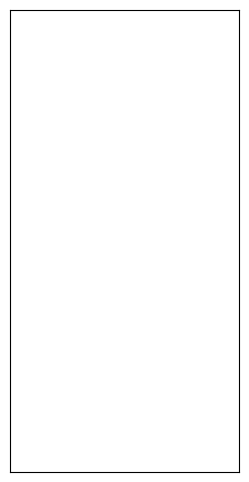

In [9]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.rcParams['animation.embed_limit'] = 2**26

# Assuming frames is a numpy array with shape (num_frames, height, width)
frames = vort_field.copy()[::4]
vmax = np.percentile(np.abs(frames), 98)

fig = plt.figure(figsize=(6, 6))
img = plt.imshow(frames[0], vmin=-vmax, vmax=vmax, cmap="RdBu")
plt.xticks([]); plt.yticks([])
# tight margins
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())

def update(frame):
        img.set_array(frame)

ani = FuncAnimation(fig, update, frames=frames, interval=100)
HTML(ani.to_jshtml())

### Implement principal component analysis


In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

# We are going to use class inheritance to define our object. The two base classes from
# scikit-learn represent placeholder objects for working with datasets. They include 
# many generic methods, like fetching parameters, getting the data shape, etc.
# 
# By inheriting from these classes, we ensure that our object will have access to these
# functions, even though we didn't define them ourselves. Earlier in the course
# we saw examples where we defined our own template classes. Here, we are using the
# template classes define by the scikit-learn Python library.
class PrincipalComponents(BaseEstimator, TransformerMixin):
    """
    A class for performing principal component analysis on a dataset.

    Parameters
        random_state (int): random seed for reproducibility
        components_ (numpy array): the principal components
        singular_values_ (numpy array): the singular values
    """

    def __init__(self, random_state=None):
        self.random_state = random_state
        np.random.seed(self.random_state)
        self.components_ = None
        self.singular_values_ = None

    def fit(self, X):
        """
        Fit the PCA model to the data X. Store the eigenvectors in the attribute
        self.components_ and the eigenvalues in the attribute self.singular_values_

        NOTE: This method needs to return self in order to work properly with the
         scikit-learn base classes from which it inherits.

        Args:
            X (np.ndarray): A 2D array of shape (n_samples, n_features) containing the
                data to be fit.
        
        Returns:
            self (PrincipalComponents): The fitted object.
        """

        ########## YOUR CODE HERE ##########
        #
        # # YOUR CODE HERE
        # # Hint: Keep track of whether you should be multiplying by a matrix or
        # # its transpose.
        X = X.astype(np.float32)

        Xc = X - np.mean(X, axis=0)

        cov = Xc.T.dot(Xc) / Xc.shape[0]
       
        S, V = np.linalg.eigh(cov)
        V = V.T
        sort_inds = np.argsort(S)[::-1] # sort eigenvalues in descending order
        S, V = S[sort_inds], V[sort_inds]

        self.components_ = V
        self.singular_values_ = S

        return self
        ########## YOUR CODE HERE ##########
        # raise NotImplementedError()
        
        # convert to 32 bit precision from 16 bit


    def transform(self, X):
        """
        Transform the data X into the new basis using the PCA components.

        Args:
            X (np.ndarray): A 2D array of shape (n_samples, n_features) containing the
                data to be transformed.

        Returns:
            X_new (np.ndarray): A 2D array of shape (n_samples, n_components) containing
                the transformed data. n_components <= n_features, depending on whether
                we truncated the eigensystem.
        """
        ########## YOUR CODE HERE ##########
        #
        # # YOUR CODE HERE
        Xc = X - np.mean(X, axis=0)
        return Xc.dot(self.components_.T)
        ########## YOUR CODE HERE ##########
        # raise NotImplementedError()


    def inverse_transform(self, X):
        """
        Transform from principal components space back to the original space

        Args:
            X (np.ndarray): A 2D array of shape (n_samples, n_components) containing the
                data to be transformed. n_components <= n_features, depending on whether
                we truncated the eigensystem.

        Returns:
            X_new (np.ndarray): A 2D array of shape (n_samples, n_features) containing
                the transformed data.
        """
        ########## YOUR CODE HERE ##########
        #
        # # YOUR CODE HERE
        return X.dot(self.components_) + np.mean(X, axis=0)
        ########## YOUR CODE HERE ##########
        # raise NotImplementedError()

    ## You shouldn't need to implement this, because it gets inherited from the base
    ## class. But if you are having trouble with the inheritance, you can uncomment
    ## this and to implement it.
    # def fit_transform(self, X):
    #     self.fit(X)
    #     return self.transform(X)


### Test and use your code

+ If you are working from a local fork of the entire course, then you already have access to the solutions. In this case, make sure to `git pull` to make sure that you are up-to-date (save your work first).
+ If you are working from a single downloaded notebook, or are working in Google Colab, then you will need to manually download the solutions file from the course repository. The lines below will do this for you.

In [12]:
import os
import requests
# Check if the "solutions" directory exists. If not, create it and download the solution file
if not os.path.exists('solutions'):
    os.makedirs('solutions')
else:
    print('Directory "solutions" already exists. Skipping creation.')

# Now download the solution file into the directory we just created
url = 'https://raw.githubusercontent.com/williamgilpin/cphy/main/hw/solutions/pca.py'
response = requests.get(url)
file_path = os.path.join('solutions', 'sandpile.py')
with open(file_path, 'wb') as file:
    file.write(response.content)
print(f'File saved to {file_path}')

Directory "solutions" already exists. Skipping creation.
File saved to solutions/sandpile.py


Running with Instructor Solutions. If you meant to run your own code, do not import from solutions


Text(0, 0.5, 'Eigenvalue rank')

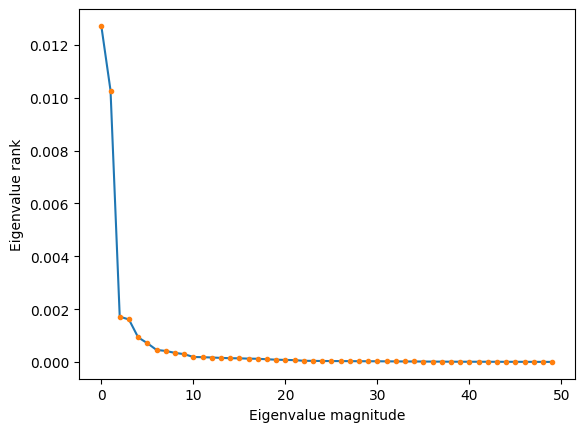

In [13]:
# Load William's solutions
from solutions.pca import PrincipalComponents

data = np.copy(vort_field)[::3, ::2, ::2] # subsample data to reduce compute load
data_reshaped = np.reshape(data, (data.shape[0], -1))

model = PrincipalComponents()
# model = PCA()

data_transformed = model.fit_transform(data_reshaped)
principal_components = np.reshape(
    model.components_, (model.components_.shape[0], data.shape[1], data.shape[2])
)

## Look at skree plot, and identify the "elbow" indicating low dimensionality
plt.figure()
plt.plot(model.singular_values_[:50])
plt.plot(model.singular_values_[:50], '.')
plt.xlabel("Eigenvalue magnitude")
plt.ylabel("Eigenvalue rank")

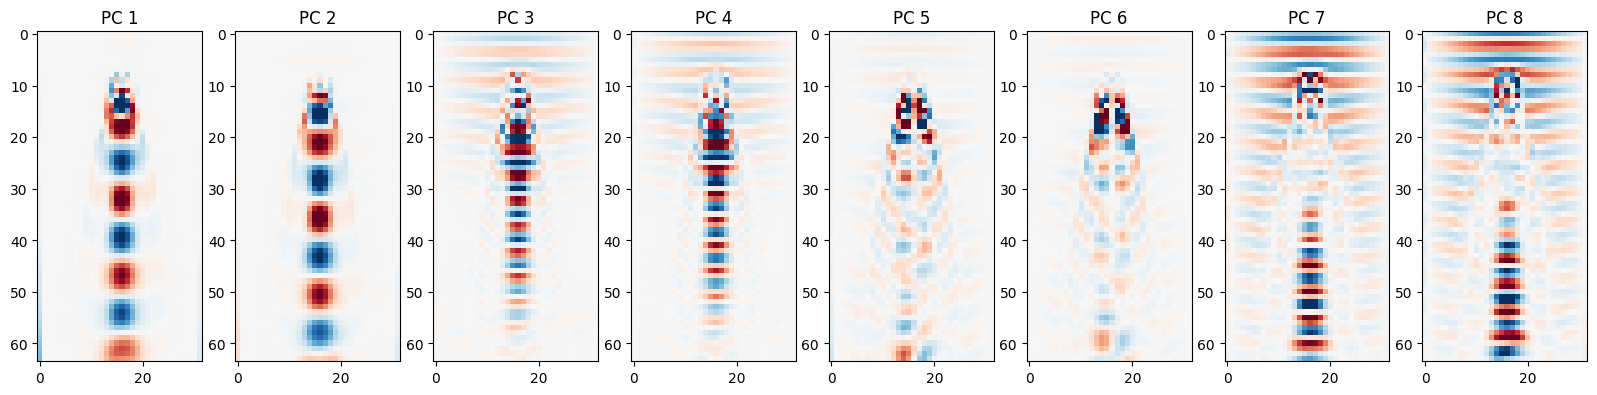

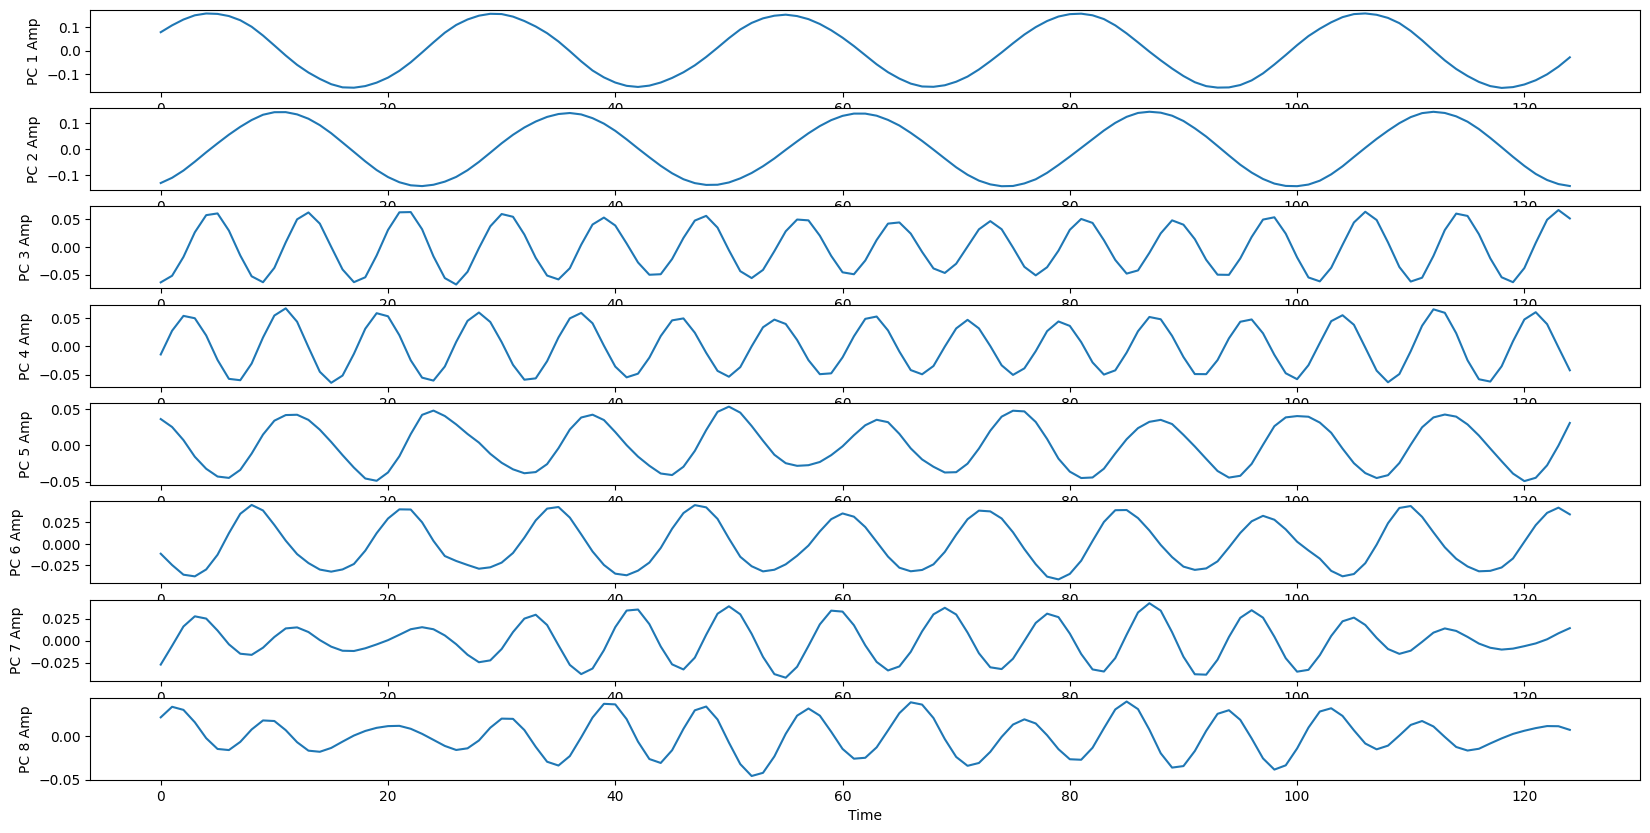

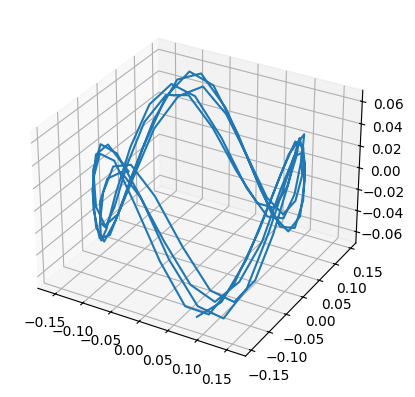

In [14]:

## Plot the principal components
plt.figure(figsize=(20, 10))
for i in range(8):
    plt.subplot(1, 8, i+1)
    vscale = np.percentile(np.abs(principal_components[i]), 99)
    plt.imshow(principal_components[i], cmap="RdBu", vmin=-vscale, vmax=vscale)
    plt.title("PC {}".format(i+1))

## Plot the movie projected onto the principal components
plt.figure(figsize=(20, 10))
for i in range(8):
    plt.subplot(8, 1, i+1)
    plt.plot(data_transformed[:, i])
    plt.ylabel("PC {} Amp".format(i+1))
plt.xlabel("Time")

## Plot the time series against each other
plt.figure()
ax = plt.axes(projection='3d')
ax.plot(data_transformed[:, 0], data_transformed[:, 1], data_transformed[:, 2])

### Follow-up ideas and additional information

+ We are applying PCA to sequences of velocity fields from a fluid flow, but this method can be applied to images, graphs, and almost any high-dimensional dataset. All that really matters is that you can take your data, and apply some sort of invertible transformation so that it becomes a big matrix of shape $(N_{samples}, N_{features})$

+ The flow field we are studying was simulated using [Lattice Boltzmann methods](http://www.scholarpedia.org/article/Lattice_Boltzmann_Method). In another module, we will learn how to numerically solve partial differential equations such as the Navier-Stokes equations that govern fluid flows. Lattice Boltzmann methods are distinct from the solvers we will use, however, because they involve simulating individual particles rather than a governing equation. LBM have significant similarity to the cellular automata we explored in previous modules.

+ What about the more general problem of finding new coordinates are that *nonlinear* functions of our observed features? One option would be to transform the data with fixed nonlinear functions that capture important features, such as trigonometric functions or spatially-localized kernels, and then apply the PCA calculation in this "lifted" space. This approach is the basis of kernel-PCA. Even more general approaches are the subject of current research in nonlinear embedding techniques, such as [UMAP and tSNE](https://pair-code.github.io/understanding-umap/).

### Extras

This is the code William uses to make videos of his plots

In [ ]:
Re = 1200 # Reynolds number, change this to 300, 600, 900, 1200

# Load the two-dimensional velocity field data. Data is stored in a 4D numpy array,
# where the first dimension is the time index, the second and third dimensions are the
# x and y coordinates, and the fourth dimension is the velocity components (ux or uv).
vfield = np.load(
    f"../resources/von_karman_street/vortex_street_velocities_Re_{Re}_largefile.npz", 
    allow_pickle=True
)
print("Velocity field data has shape: {}".format(vfield.shape))

# Calculate the vorticity, which is the curl of the velocity field
vort_field = np.diff(vfield, axis=1)[..., :-1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0] 

Velocity field data has shape: (3000, 256, 128, 2)


## Future

*These are some ideas for future versions of this assignment. They are not part of the homework*


### Random matrices

In [107]:
def skew_rot_scale(a):
    """
    Decompose a matrix into translation, skew, rotation, and scale components
    """
    # Translation
    t = a[:, -1]
    # Rotation and scale
    r = a[:-1, :-1]
    # Skew
    s = 0.5 * (r - r.T)
    # Scale
    c = 0.5 * (r + r.T)
    return t, s, c

    

In [147]:
a = np.random.random(size=(10, 10))
a = np.random.normal(size=(10, 10))

# a = np.random.random(size=(500, 500))
# a = np.random.normal(size=(500, 500))
# a = a + a.T
# a = a - np.mean(a, axis=1)
t, s, c = skew_rot_scale(a)

# print(np.linalg.eig(a)[0])
# print(np.linalg.norm(c))
# print(np.linalg.det(a))

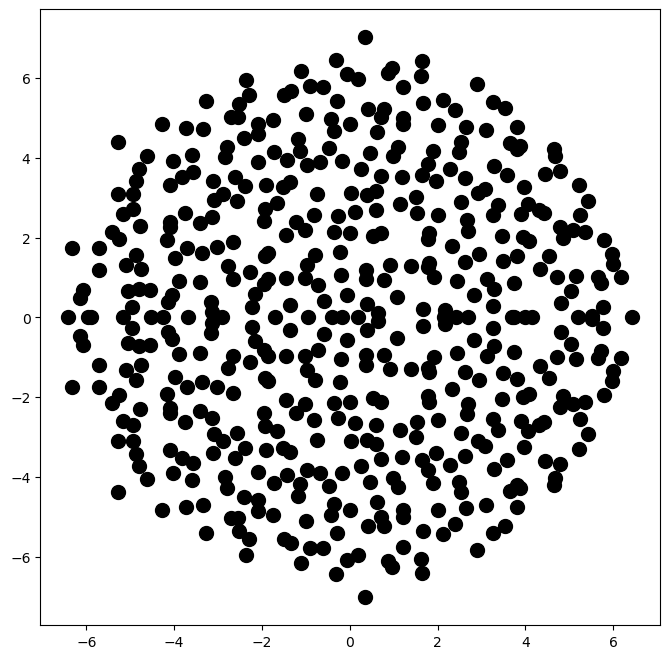

In [164]:
## Girko-Ginibri circular law

a = np.random.random(size=(500, 500))
a = a - np.mean(a, axis=1)

# a = np.random.normal(size=(500, 500))

# a = a + a.T

eig = np.linalg.eig(a)[0]

plt.figure(figsize=(8, 8))
plt.plot(eig.real, eig.imag, '.k', markersize=20)

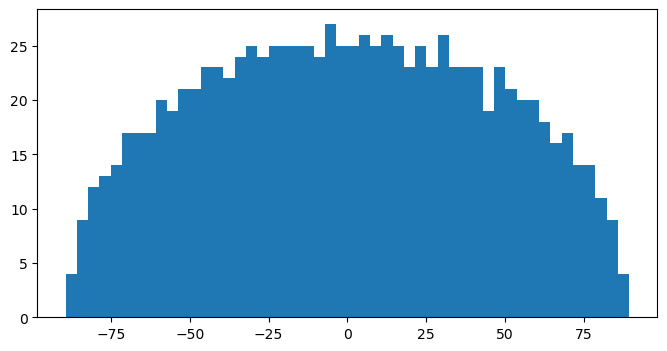

In [81]:
## Wigner's Semicircle Law

a = np.random.normal(size=(1000, 1000))
a = a + a.T

eig = np.linalg.eig(a)[0]

plt.figure(figsize=(8, 4))
plt.hist(eig, bins=50);

In [ ]:
## Make an interactive video (optional; requires ipywidgets and has some RAM overhead)

from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

frames = vort_field[::10]

vscale = np.percentile(np.abs(vort_field), 98)
def plotter(i):
    plt.close()
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(
        frames[i],
        vmin=-vscale, vmax=vscale, cmap="RdBu"
    )
    plt.show()

interact(
    plotter, 
    i=widgets.IntSlider(0, 0, len(frames) - 1, 1, layout=Layout(width='500px'))
)

In [ ]:


vort_field2 = vort_field[::5][:500]
vscale = np.percentile(np.abs(vort_field2), 95)

for i in range(len(vort_field2) - 1):
    
    
    out_path = "private_dump/wake/frame" + str(i).zfill(4) + ".png"

    plt.figure()
    plt.imshow(vort_field2[i], cmap="RdBu", vmin=-vscale, vmax=vscale)

    plt.xlim([0, vort_field2.shape[-1]])
    plt.ylim([60, 60 + vort_field2.shape[-1]])

    ax = plt.gca()
    ax.set_axis_off()
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.set_aspect(1, adjustable='box')

    plt.savefig(out_path, bbox_inches='tight', pad_inches=0.0, dpi=300)
    plt.close()


